In [29]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
#### Load 5UTR Fasta files into dataframe

UTR5_Dict={}
UTR5_Dict2={}
with open("5UTR.fasta", "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        UTR5_Dict[record.id]= record.seq
        UTR5_Dict2[record.id]= len(record.seq)
s1 = pd.Series(data=UTR5_Dict)
s2 =pd.Series(data=UTR5_Dict2)
df_5UTR= pd.concat([s1, s2], axis=1)
df_5UTR=df_5UTR.rename(columns={0:"Sequence", 1:"Sequence Length"})

df_5UTR.index.name = 'Gene'
UTR5_meanlength= df_5UTR["Sequence Length"].mean() #Get mean length of 5UTR
UTR5_num=df_5UTR.count()[0]#Get number of squences for 5UTR


#### Load 3UTR Fasta files into dataframe
UTR3_Dict={}
UTR3_Dict2={}
with open("3UTR.fasta", "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        UTR3_Dict[record.id]= record.seq
        UTR3_Dict2[record.id]= len(record.seq)
s1 = pd.Series(data=UTR3_Dict)
s2 =pd.Series(data=UTR3_Dict2)
df_3UTR= pd.concat([s1, s2], axis=1)
df_3UTR=df_3UTR.rename(columns={0:"Sequence", 1:"Sequence Length"})


df_3UTR.index.name = 'Gene'
UTR3_meanlength= df_3UTR["Sequence Length"].mean()#Get mean length of 3UTR
UTR3_num=df_3UTR.count()[0] #Get number of squences for 3UTR


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 'U' mode is deprecated


In [38]:
df_5UTR.head()


,Sequence,Sequence Length
Gene,,
danRer11_ensGene_ENSDART00000000004.5,"(G, C, G, G, A, A, G, C, C, G, T, G, G, G, C, ...",57
danRer11_ensGene_ENSDART00000000042.11,"(T, T, A, C, C, T, G, C, T, C, C, A, G, G, T, ...",35
danRer11_ensGene_ENSDART00000000069.8,"(A, G, T, T, G, C, A, A, C, A, C, A, G, T, G, ...",138
danRer11_ensGene_ENSDART00000000070.7,"(A, T, C, A, C, G, C, A, C, C, G, T, T, G, C, ...",153
danRer11_ensGene_ENSDART00000000160.10,"(C, G, C, A, T, A, C, T, T, C, T, A, T, A, C, ...",449


In [33]:
df_3UTR.head()


,Sequence,Sequence Length
Gene,,
danRer11_ensGene_ENSDART00000000004.5,"(G, T, G, G, G, A, T, T, T, G, A, A, C, T, C, ...",1096
danRer11_ensGene_ENSDART00000000042.11,"(T, C, C, A, A, G, C, T, G, G, A, T, T, T, A, ...",75
danRer11_ensGene_ENSDART00000000069.8,"(G, C, C, T, C, C, T, G, C, G, T, G, C, C, T, ...",740
danRer11_ensGene_ENSDART00000000070.7,"(G, C, C, T, T, C, A, G, C, C, G, C, T, C, C, ...",1388
danRer11_ensGene_ENSDART00000000160.10,"(A, C, C, T, C, G, T, T, T, C, G, G, T, C, C, ...",559


   Count     UTR
0  40074  5' UTR
1  37996  3' UTR


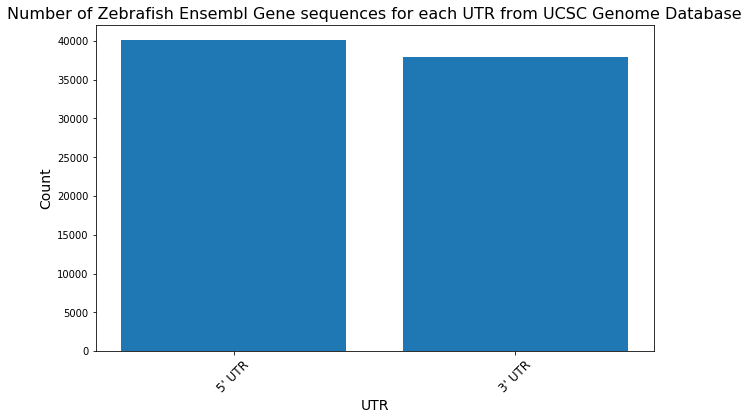

In [34]:
#Make Bar Graph of number of genes

df= pd.DataFrame(data={"UTR": ["5' UTR", "3' UTR"], "Count": [UTR5_num, UTR3_num]})
print(df)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df['UTR'])),df['Count'], align = 'center')
# Formatting graph
plt.xticks(range(len(df['UTR'])), df['UTR'],rotation = 45, fontsize = 12)
plt.xlabel('UTR', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Zebrafish Ensembl Gene sequences for each UTR from UCSC Genome Database', fontsize=16)

plt.show()

         Mean     UTR
0  303.838249  5' UTR
1  905.884988  3' UTR


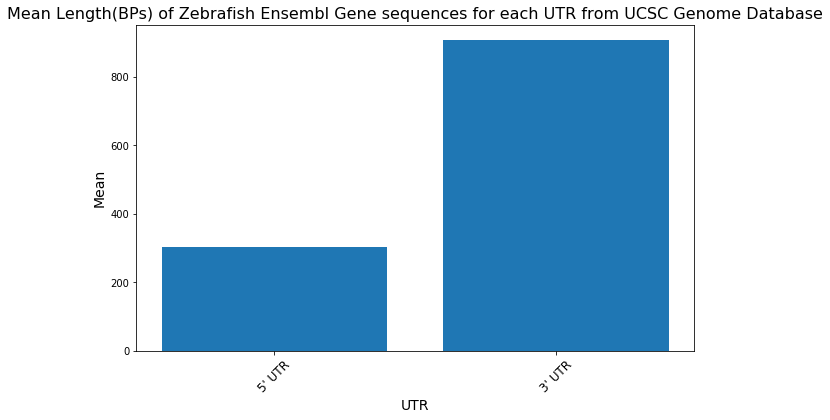

In [35]:
#Make Bar Graph of mean lengths

df2= pd.DataFrame(data={"UTR": ["5' UTR", "3' UTR"], "Mean": [UTR5_meanlength, UTR3_meanlength]})
print(df2)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df2['UTR'])),df2['Mean'], align = 'center')
# Formatting graph
plt.xticks(range(len(df2['UTR'])), df2['UTR'],rotation = 45, fontsize = 12)
plt.xlabel('UTR', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.title('Mean Length(BPs) of Zebrafish Ensembl Gene sequences for each UTR from UCSC Genome Database', fontsize=16)

plt.show()